# Statement svm

In [1]:
from sklearn.svm import SVC
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

csv = pandas.read_csv("svm-data.csv", header=None)
csv.head()

,0,1,2
0,0.0,0.70,0.29
1,1.0,0.23,0.55
2,0.0,0.72,0.42
3,0.0,0.98,0.68
4,0.0,0.48,0.39


In [2]:
y = csv[[0]]
x = csv[[1, 2]]
svc = SVC(C=100000, random_state=241)
svc.fit(x, y.values.ravel())
for i in svc.support_:
    print(i+1)

4
5
10


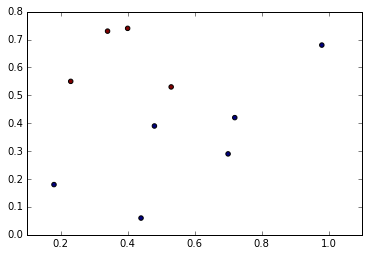

In [3]:
plt.scatter(x[1], x[2], c=y)
plt.show()

# SVM Text

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [5]:
newsgroups = datasets.fetch_20newsgroups(
                    subset='all',
                    categories=['alt.atheism', 'sci.space'])
X = newsgroups.data
y = newsgroups.target

In [6]:
vectorizer = TfidfVectorizer()
X_scored = vectorizer.fit_transform(X, y)

grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(y.size, n_folds=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X_scored, y)
for a in gs.grid_scores_:
    print(a.mean_validation_score)
    print(a.parameters)

0.552631578947
{'C': 1.0000000000000001e-05}
0.552631578947
{'C': 0.0001}
0.552631578947
{'C': 0.001}
0.552631578947
{'C': 0.01}
0.950167973124
{'C': 0.10000000000000001}
0.993281075028
{'C': 1.0}
0.993281075028
{'C': 10.0}
0.993281075028
{'C': 100.0}
0.993281075028
{'C': 1000.0}
0.993281075028
{'C': 10000.0}
0.993281075028
{'C': 100000.0}


In [7]:
C = 1.0

clf_good = SVC(C=C, kernel='linear', random_state=241)
clf_good.fit(X_scored, y)
weights = clf_good.coef_
weights

<1x28382 sparse matrix of type '<class 'numpy.float64'>'
	with 18404 stored elements in Compressed Sparse Row format>

In [8]:
topWeights = sorted(zip(weights.indices, weights.data), key=lambda e: abs(e[1]), reverse=True)[:10]
feature_mapping = vectorizer.get_feature_names()
words = [feature_mapping[i] for (i, w) in topWeights]
words

['space',
 'god',
 'atheism',
 'atheists',
 'moon',
 'sky',
 'religion',
 'bible',
 'keith',
 'sci']